--- 1. Loading and Initial Exploration ---
Original Data Shape: (909, 12)
Missing Data before cleaning:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            199
SibSp            0
Parch            0
Ticket           0
Fare            18
Cabin          701
Embarked         2
dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_1780\2971524714.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='viridis')


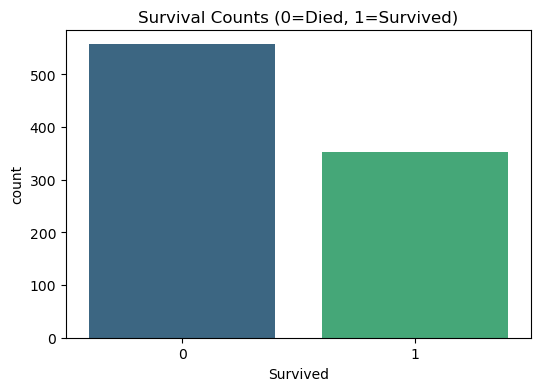


--- 2. Cleaning and Modifying Data ---
Data Modified Successfully. File 'titanic_modified.csv' saved.

--- 4. Predictive Modeling ---
Data Shape before final drop: (909, 14)
Data Shape after final drop: (832, 14)
------------------------------------------------
FINAL MODEL ACCURACY: 75.45%
------------------------------------------------


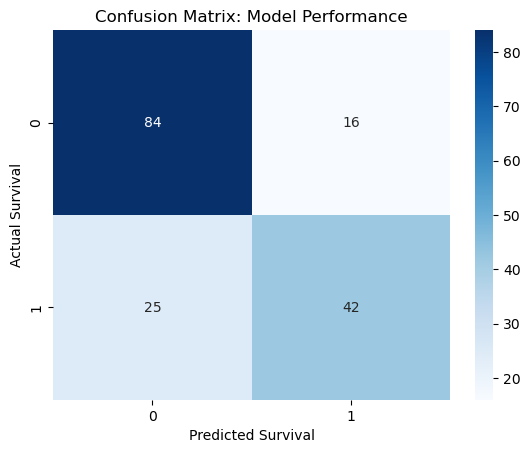

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# --- 1. LOAD & EXPLORE DATA (EDA) ---
print("--- 1. Loading and Initial Exploration ---")

# *** USING YOUR CORRECTED FILE PATH ***
df = pd.read_csv(r'C:\Users\admin\Desktop\Titanic_Project\titanic2.csv') 

print(f"Original Data Shape: {df.shape}")
print("Missing Data before cleaning:\n", df.isnull().sum())

# Visualize Survival Count
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Survival Counts (0=Died, 1=Survived)')
plt.show()


# --- 2. CLEANING AND MODIFYING DATA (FINAL CORRECT ORDER) ---
print("\n--- 2. Cleaning and Modifying Data ---")

# A. Handle Missing Values (Age, Embarked, Fare)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce') 
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# B. Convert Pclass Text to Numbers
df['Pclass'] = df['Pclass'].astype(str).str.replace(r'[^\d]', '', regex=True).astype(int)

# C. Create New Features
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['SibSp'] = df['SibSp'].fillna(0).astype(int)
df['Parch'] = df['Parch'].fillna(0).astype(int)

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 

# D. Convert Embarked (Text) to Numbers
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# E. DROP COLUMNS WITH TOO MUCH MISSING DATA OR NO VALUE 
df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'SibSp', 'Parch'], axis=1)


# --- 3. SAVE THE MODIFIED FILE ---
df.to_csv('titanic_modified.csv', index=False)
print("Data Modified Successfully. File 'titanic_modified.csv' saved.")


# --- 4. PREDICTIVE MODELING ---
print("\n--- 4. Predictive Modeling ---")

# *** FINAL SANITY CHECK: DROP ANY REMAINING ROWS WITH NaN ***
# This guarantees no missing values remain before the model trains.
print(f"Data Shape before final drop: {df.shape}")
df = df.dropna()
print(f"Data Shape after final drop: {df.shape}")

# Define features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression Model
model = LogisticRegression(max_iter=5000) 
model.fit(X_train, y_train)

# Evaluate the Model
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)

print("------------------------------------------------")
print(f"FINAL MODEL ACCURACY: {acc * 100:.2f}%")
print("------------------------------------------------")

# Visualize the Confusion Matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Model Performance')
plt.ylabel('Actual Survival')
plt.xlabel('Predicted Survival')
plt.show()